In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter

In [4]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
#print(faces.images[0])
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


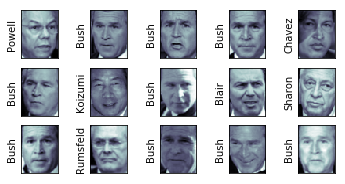

In [5]:
#Try to plot the faces from faces.images matrix and faces.target_names as labels. TIP: use subplots and imshow functions from matplotlib
fig, ax = plotter.subplots(3, 5, figsize=(6, 3))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1], color = "black")

In [6]:
from sklearn import svm, metrics
n_samples = len(faces.images)
data = faces.images.reshape((n_samples, -1))
print(data.shape)

(1348, 2914)


In [8]:
#here we will use a principal component analysis to extract 150 fundamental components to feed into our 
#support vector machine classifier. 
#We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline 
#using make_pipeline function
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca=PCA(n_components=150,svd_solver='randomized')
clf=SVC(kernel='rbf', C=1E6)
X, y = faces.data, faces.target

poly_model = make_pipeline(pca,clf)
poly_model.fit(X,y)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)), ('svc', SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [9]:
#For the sake of testing our classifier output, you have to will split the data into a training and testing set. 
#TIP: use training_test_split function from _sklearn.cross_validation_
from sklearn.cross_validation import train_test_split


/home/osboxes/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
#Perform a grid search cross-validation to explore combinations of parameters. 
#Here we will adjust C (which controls the margin hardness) and 
#gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. 
#TIP: use GridSearchCV from _sklearn.grid_search_, use following values for 'svn__c': [1, 5, 10, 50] 
#and 'svc__gamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters.
from sklearn.grid_search import GridSearchCV
tuned_parameters = [{'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005],'kernel': ['rbf']}]


/home/osboxes/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [12]:
#Print best parameters from grid search. If The optimal values fall fell at the edges, 
#we would want to expand the grid to make sure we have found the true optimum.
pca = PCA (n_components=50,svd_solver='randomized',whiten=True)   

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
best_model=make_pipeline(pca,clf)
best_model.fit(X_train, y_train)
print(clf.best_params_)

{'C': 5, 'gamma': 0.005, 'kernel': 'rbf'}


In [13]:
#Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1).
a=best_model.predict(X_test)

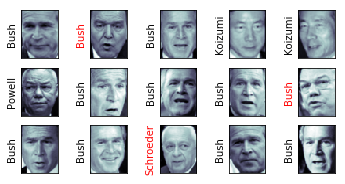

In [14]:
fig, axes = plotter.subplots(3, 5,figsize=(6, 3))
for i, axi in enumerate(axes.flat):
#axi.imshow(data[i].reshape(62,47), cmap='bone')
    axi.imshow(X_test[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    if y_test[i]==a[i]:
        axi.set_ylabel(faces.target_names[a[i]].split()[-1], color = "black")
        
    else:
        axi.set_ylabel(faces.target_names[a[i]].split()[-1], color = "red")